In [3]:
import pyodbc 

In [4]:
import pandas as pd

In [5]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=.\SQLEXPRESS;'
                      'Database=AdventureWorks2019;'
                      'Trusted_Connection=yes;')

In [4]:
cursor = conn.cursor()

In [6]:
sqlQ=pd.read_sql_query("select * from [Sales].[CurrencyRate] where ToCurrencyCode='GBP' order by ModifiedDate asc",conn)

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import datetime as dt
import time

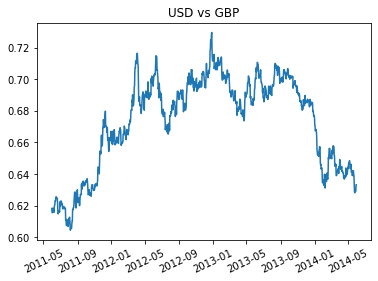

In [22]:
plt.xticks(rotation=25)
plt.title('USD vs GBP')
plt.plot(sqlQ['ModifiedDate'],sqlQ['AverageRate'])


In [13]:
sqlQ2=pd.read_sql_query("select st.TaxRate,sp.Name from [Sales].[SalesTaxRate] st inner join [Person].[StateProvince] sp on st.StateProvinceID=sp.StateProvinceID",conn)

<BarContainer object of 29 artists>

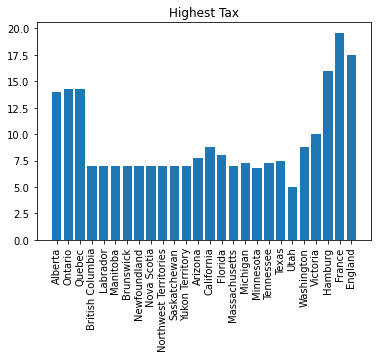

In [23]:
plt.xticks(rotation=90)
plt.title('Highest Tax')
plt.bar(sqlQ2['Name'],sqlQ2['TaxRate'])

In [6]:
sqlQ3=pd.read_sql_query("select sum (unitprice) as UnitPriceSold,sum (linetotal) as LineTotal, ModifiedDate from [Sales].[SalesOrderDetail] group by  (ModifiedDate) order by ModifiedDate desc",conn)

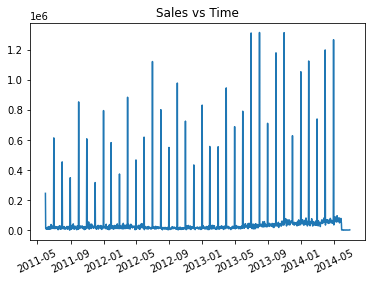

In [8]:
plt.xticks(rotation=25)
#plt.yticks(range(90000, 1300000))
plt.title('Sales vs Time')
plt.plot(sqlQ3['ModifiedDate'],sqlQ3['UnitPriceSold'])